In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress



In [3]:
csv_path = 'combined data_1002.csv'
master_data = pd.read_csv(csv_path)
master_df = pd.DataFrame(master_data)
master_df.columns

Index(['Unnamed: 0', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament', 'city', 'country', 'neutral', 'year',
       'month', 'goal_diff', 'home_result', 'lat', 'lng', 'host_continent',
       'home_continent', 'away_continent', 'result', 'results', 'total_goals'],
      dtype='object')

In [4]:
master_df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
master_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,...,goal_diff,home_result,lat,lng,host_continent,home_continent,away_continent,result,results,total_goals
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,...,0,Tie,NaN,NaN,Europe,Europe,Europe,NaN,Tie,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,...,2,win,NaN,NaN,Europe,Europe,Europe,NaN,England,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,...,1,win,NaN,NaN,Europe,Europe,Europe,NaN,Scotland,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,...,0,Tie,NaN,NaN,Europe,Europe,Europe,NaN,Tie,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,...,3,win,NaN,NaN,Europe,Europe,Europe,NaN,Scotland,3


In [31]:
csv_path2 = 'Countries of the world-f.csv'
country_data = pd.read_csv(csv_path2)
country_df = pd.DataFrame(country_data)
country_com_df=country_df.loc[:,['Country','Region','Population','Area','Pop. Density','GDP','Literacy']]
#country_com_df.rename(columns={'Country':'countries'},inplace=True)
country_com_df.head()

,Country,Region,Population,Area,Pop. Density,GDP,Literacy
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,700.0,36.0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,4500.0,86.5
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,6000.0,70.0
3,American Samoa,OCEANIA,57794,199,290.4,8000.0,97.0
4,Andorra,WESTERN EUROPE,71201,468,152.1,19000.0,100.0


In [6]:
fifa_cup_only=master_df.loc[master_df['tournament']=='FIFA World Cup']

In [7]:
fifa_cup_only.reset_index(drop=True,inplace=True)
fifa_cup_only.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,...,goal_diff,home_result,lat,lng,host_continent,home_continent,away_continent,result,results,total_goals
0,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,...,3,lose,NaN,NaN,South America,Europe,NCAC,NaN,United States,3
1,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,...,3,win,NaN,NaN,South America,Europe,NCAC,NaN,France,5
2,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930,...,1,lose,NaN,NaN,South America,South America,Europe,NaN,Yugoslavia,3
3,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930,...,2,lose,NaN,NaN,South America,South America,Europe,NaN,Romania,4
4,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,...,1,win,NaN,NaN,South America,South America,Europe,NaN,Argentina,1


In [34]:
#fifa_cup_only1=fifa_cup_only.iloc[:,[1,2,3,4,5,7,8,-1,-2]]
#fifa_cup_only1.head()

,home_team,away_team,home_score,away_score,tournament,country,neutral,total_goals,results
0,Belgium,United States,0,3,FIFA World Cup,Uruguay,True,3,United States
1,France,Mexico,4,1,FIFA World Cup,Uruguay,True,5,France
2,Brazil,Yugoslavia,1,2,FIFA World Cup,Uruguay,True,3,Yugoslavia
3,Peru,Romania,1,3,FIFA World Cup,Uruguay,True,4,Romania
4,Argentina,France,1,0,FIFA World Cup,Uruguay,True,1,Argentina


In [8]:
def result(row):
      
    if row['home_score'] > row['away_score']:
        return row['away_team']
    elif row['home_score'] < row['away_score']:
        return row['home_team']
    else:
        return('Tie')
fifa_cup_only['who_loses'] = fifa_cup_only[['home_score','away_score','home_team','away_team']].apply(result,axis=1)
fifa_cup_only.head()

C:\Users\tobe\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,...,home_result,lat,lng,host_continent,home_continent,away_continent,result,results,total_goals,who_loses
0,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,...,lose,NaN,NaN,South America,Europe,NCAC,NaN,United States,3,Belgium
1,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,...,win,NaN,NaN,South America,Europe,NCAC,NaN,France,5,Mexico
2,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930,...,lose,NaN,NaN,South America,South America,Europe,NaN,Yugoslavia,3,Brazil
3,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930,...,lose,NaN,NaN,South America,South America,Europe,NaN,Romania,4,Peru
4,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,...,win,NaN,NaN,South America,South America,Europe,NaN,Argentina,1,France


In [9]:
fifa_cup_only.rename(columns={'results':'who_wins'},inplace=True)


C:\Users\tobe\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [10]:
fifa_cup_only.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,...,home_result,lat,lng,host_continent,home_continent,away_continent,result,who_wins,total_goals,who_loses
0,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,...,lose,NaN,NaN,South America,Europe,NCAC,NaN,United States,3,Belgium
1,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,...,win,NaN,NaN,South America,Europe,NCAC,NaN,France,5,Mexico
2,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930,...,lose,NaN,NaN,South America,South America,Europe,NaN,Yugoslavia,3,Brazil
3,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930,...,lose,NaN,NaN,South America,South America,Europe,NaN,Romania,4,Peru
4,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,...,win,NaN,NaN,South America,South America,Europe,NaN,Argentina,1,France


In [11]:
win_country=fifa_cup_only.groupby('who_wins')['home_team'].count()
lose_country=fifa_cup_only.groupby('who_loses')['home_team'].count()
total_goal_home_a=fifa_cup_only.groupby('home_team')['home_score'].sum()
total_goal_away_a=fifa_cup_only.groupby('away_team')['away_score'].sum()
total_goal_home_d=fifa_cup_only.groupby('home_team')['away_score'].sum()
total_goal_away_d=fifa_cup_only.groupby('away_team')['home_score'].sum()
total_game_home=fifa_cup_only.groupby('home_team')['home_team'].count()  
total_game_away=fifa_cup_only.groupby('away_team')['away_team'].count() 


In [12]:
tie_country_l=pd.DataFrame(fifa_cup_only.loc[fifa_cup_only['who_wins']=='Tie'])
tie_total_home=tie_country_l.groupby('home_team')['home_team'].count()
tie_total_away=tie_country_l.groupby('away_team')['away_team'].count()

In [13]:
tie_total=pd.concat([tie_total_home,tie_total_away],join='outer',axis=1,sort=True)
tie_total.fillna(0,inplace=True)
tie_total['total_tie']=tie_total['home_team']+tie_total['away_team']
tie_total.index.name='countries'
#tie_total

In [14]:
total_game_country=pd.concat([total_game_home,total_game_away],join='outer',axis=1,sort=True)
total_game_country.fillna(0,inplace=True)
total_game_country['total_game']=total_game_country['home_team']+total_game_country['away_team']
total_game_country.index.name='countries'
#total_game_country


In [15]:
total_attack=pd.concat([total_goal_home_a,total_goal_away_a],join='outer',axis=1,sort=True)
total_attack.fillna(0,inplace=True)
total_attack['total_attack']=total_attack['home_score']+total_attack['away_score']
total_attack.index.name='countries'
#total_attack

In [16]:
total_defence=pd.concat([total_goal_home_d,total_goal_away_d],join='outer',axis=1,sort=True)
total_defence.fillna(0,inplace=True)
total_defence['total_defence']=total_defence['home_score']+total_defence['away_score']
total_defence.index.name='countries'
#total_defence

In [17]:
total_win_lose=pd.concat([win_country,lose_country],join='outer',axis=1,sort=True)
total_win_lose.fillna(0,inplace=True)
total_win_lose.index.name='countries'
total_win_lose.columns=['total_win','total_lose']
#total_win_lose

In [ ]:
# tie_total
# total_game_country
# total_attack
# total_defence
# total_win_lose


In [39]:
d=pd.merge(total_game_country,total_win_lose,how='outer',on='countries')
e=pd.merge(d,tie_total,how='outer',on='countries')
f=pd.merge(e,total_attack,how='outer',on='countries')
g=pd.merge(f,total_defence,how='outer',on='countries')
g.fillna(0,inplace=True)
fifa_country_card=g.iloc[:,[2,3,4,7,10,13]]
fifa_country_card.reset_index(inplace=True)
fifa_country_card.head()

,countries,total_game,total_win,total_lose,total_tie,total_attack,total_defence
0,Algeria,13.0,3.0,7,3.0,13.0,19.0
1,Angola,3.0,0.0,1,2.0,1.0,2.0
2,Argentina,81.0,43.0,23,15.0,137.0,93.0
3,Australia,16.0,2.0,10,4.0,13.0,31.0
4,Austria,29.0,12.0,13,4.0,43.0,47.0


In [35]:
country_com_df['countries']=country_com_df['Country'].str.strip()
fifa_with_countryinfo=pd.merge(fifa_country_card,country_com_df,how='left',on='countries')

In [60]:
fifa_with_countryinfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 14 columns):
countries        82 non-null object
total_game       82 non-null float64
total_win        82 non-null float64
total_lose       82 non-null int64
total_tie        82 non-null float64
total_attack     82 non-null float64
total_defence    82 non-null float64
Country          66 non-null object
Region           66 non-null object
Population       66 non-null float64
Area             66 non-null float64
Pop. Density     66 non-null float64
GDP              66 non-null float64
Literacy         65 non-null float64
dtypes: float64(10), int64(1), object(3)
memory usage: 9.6+ KB


In [67]:
fifa_with_countryinfo.dropna(inplace=True)

In [68]:
fifa_with_countryinfo

,countries,total_game,total_win,total_lose,total_tie,total_attack,total_defence,Country,Region,Population,Area,Pop. Density,GDP,Literacy
0,Algeria,13.0,3.0,7,3.0,13.0,19.0,Algeria,NORTHERN AFRICA,32930091.0,2381740.0,13.8,6000.0,70.0
1,Angola,3.0,0.0,1,2.0,1.0,2.0,Angola,SUB-SAHARAN AFRICA,12127071.0,1246700.0,9.7,1900.0,42.0
2,Argentina,81.0,43.0,23,15.0,137.0,93.0,Argentina,LATIN AMER. & CARIB,39921833.0,2766890.0,14.4,11200.0,97.1
3,Australia,16.0,2.0,10,4.0,13.0,31.0,Australia,OCEANIA,20264082.0,7686850.0,2.6,29000.0,100.0
4,Austria,29.0,12.0,13,4.0,43.0,47.0,Austria,WESTERN EUROPE,8192880.0,83870.0,97.7,30000.0,98.0
5,Belgium,48.0,20.0,19,9.0,68.0,72.0,Belgium,WESTERN EUROPE,10379067.0,30528.0,340.0,29100.0,98.0
6,Bolivia,6.0,0.0,5,1.0,1.0,20.0,Bolivia,LATIN AMER. & CARIB,8989046.0,1098580.0,8.2,2400.0,87.2
8,Brazil,109.0,73.0,18,18.0,229.0,105.0,Brazil,LATIN AMER. & CARIB,188078227.0,8511965.0,22.1,7600.0,86.4
9,Bulgaria,26.0,3.0,15,8.0,22.0,53.0,Bulgaria,EASTERN EUROPE,7385367.0,110910.0,66.6,7600.0,98.6
10,Cameroon,23.0,4.0,12,7.0,18.0,43.0,Cameroon,SUB-SAHARAN AFRICA,17340702.0,475440.0,36.5,1800.0,79.0


In [69]:
y1=fifa_with_countryinfo['total_game']
x1=fifa_with_countryinfo['Population']
x2=fifa_with_countryinfo['Area']
x3=fifa_with_countryinfo['GDP']
x4=fifa_with_countryinfo['Literacy']


In [72]:
(slope1, intercept1, r1, p1, _) = linregress(x1, y1)
# (slope2, intercept2, r2, p2, _) = linregress(x2, y1)
# (slope3, intercept3, r3, p3, _) = linregress(x3, y1)
# (slope4, intercept4, r4, p4, _) = linregress(x4, y1)
fit1 = slope1 * x1 + intercept1
# fit2 = slope2 * x2 + intercept2
# fit3 = slope3 * x3 + intercept3
# fit4 = slope4 * x4 + intercept4


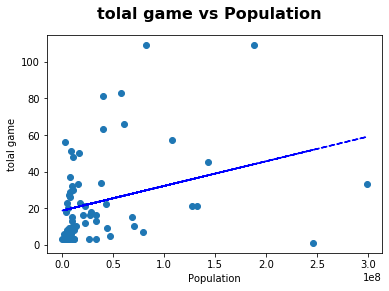

In [73]:
fig, ax = plt.subplots()

fig.suptitle("tolal game vs Population", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)

ax.set_xlabel("Population")
ax.set_ylabel("tolal game")

ax.plot(x1,y1, linewidth=0, marker='o')
ax.plot(x1,fit1,'b--')

plt.show()